In [14]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
# Visualization
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



In [2]:
# 1. Data load
df_bank_fraud = pd.read_csv("Bank_transaction_fraud_detection.csv")

In [3]:
df_bank_fraud

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11/1/2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156342,f596668a-39e9-4f58-bc33-1c97f54ae343,Ansh Agrawal,Female,52,Arunachal Pradesh,Itanagar,Itanagar Branch,Savings,abaf2883-2ab2-4360-93ae-6eebb9a5ba37,17-01-2025,...,Health,48152.65,ATM Booth Kiosk,"Itanagar, Arunachal Pradesh",ATM,0,INR,+9199893XXXXXX,Moving services payment,anshXXXX@XXXXXXX.com
156343,07513777-8e89-4abc-b561-5ed3331a8f4a,Suhani Bhasin,Female,64,Delhi,South Delhi,South Delhi Branch,Business,e520daaa-2d08-4939-a9d5-df67512ad4a9,12/1/2025,...,Clothing,69956.08,POS Mobile App,"South Delhi, Delhi",Desktop,0,INR,+9191151XXXXXX,Bitcoin transaction,suhaniXXXX@XXXXX.com
156344,dfdd6356-5c6e-4eb6-b6a6-9365c9ee5399,Karan Dass,Female,34,Lakshadweep,Kavaratti,Kavaratti Branch,Checking,035ef4d9-f670-4c9c-954c-38e023661a13,7/1/2025,...,Entertainment,62197.09,Voice Assistant,"Kavaratti, Lakshadweep",Desktop,0,INR,+9199760XXXXXX,Medical treatment payment,karanXXXX@XXXXX.com
156345,953268d2-f0ec-41be-9b5e-5cd38032c0a4,Dev Sarma,Male,20,Puducherry,Mahe,Mahe Branch,Savings,7568fb14-76c3-46a8-9dfd-192ad6e29046,9/1/2025,...,Clothing,27862.23,POS Mobile App,"Mahe, Puducherry",Mobile,0,INR,+9195478XXXXXX,Gift card purchase,devXXXXX@XXXXX.com


In [4]:
## Count of records  with Is fraud
## Count shows  the dataset is imbalancced
bank_fraud_df["Is_Fraud"].value_counts()

0    148436
1      7911
Name: Is_Fraud, dtype: int64

In [6]:
# 2. Label NaN rows remove
df_bank_fraud = df_bank_fraud.dropna(subset=['Is_Fraud'])

# 3. Independent (X) & dependent (y)
independent = df_bank_fraud[[
    'Age',
    'Transaction_Amount',
    'Account_Balance',
    'Transaction_Type',
    'Merchant_Category',
    'Device_Type',
    'State',
    'City'
]]
dependent = df_bank_fraud['Is_Fraud']


In [7]:
# 4. Train–test split (stratify for imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    independent,
    dependent,
    test_size=0.30,
    random_state=0,
    stratify=dependent
)

# 5. Columns by type
num_cols = ['Age', 'Transaction_Amount', 'Account_Balance']
cat_cols = ['Transaction_Type', 'Merchant_Category', 'Device_Type', 'State', 'City']


In [8]:
# 6. Preprocessing: pass numeric, OneHot encode categorical
preprocess = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)



# 1.Logistic Regression

Default threshold (0.5)
Accuracy: 0.531947553565718
              precision    recall  f1-score   support

           0       0.95      0.53      0.68     44532
           1       0.05      0.48      0.09      2373

    accuracy                           0.53     46905
   macro avg       0.50      0.51      0.39     46905
weighted avg       0.90      0.53      0.65     46905

Custom threshold (0.3)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     44532
           1       0.05      1.00      0.10      2373

    accuracy                           0.05     46905
   macro avg       0.03      0.50      0.05     46905
weighted avg       0.00      0.05      0.00     46905



C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix
[[23821 20711]
 [ 1243  1130]]


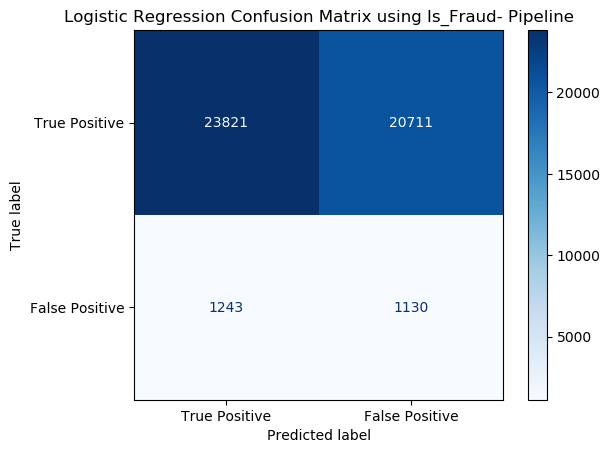

In [82]:
# 1a. Model pipeline: preprocessing + Logistic Regression (balanced)
lr_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        solver='liblinear'
    ))
])

#1b. Train model
lr_model.fit(X_train, y_train)

#1c. Evaluation – default threshold 0.5
y_pred = lr_model.predict(X_test)
print("Default threshold (0.5)")
LR_Accuracy= (accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#1d. Evaluation – custom threshold 0.3
y_proba = lr_model.predict_proba(X_test)[:, 1]      # probability of fraud
y_pred_03 = (y_proba >= 0.3).astype(int)

print("Custom threshold (0.3)")
print(classification_report(y_test, y_pred_03))

#1e.Classification Report
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, y_pred, labels=[0,1])
print("Confusion Matrix")
print(lr_cm)

#1f.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='Blues')
plt.title(f"Logistic Regression Confusion Matrix using Is_Fraud- {rf_model.__class__.__name__}")
plt.show()


# 2.Random Forest

Default threshold (0.5)
Accuracy: 0.9487687879756955
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     44532
           1       0.03      0.00      0.00      2373

    accuracy                           0.95     46905
   macro avg       0.49      0.50      0.49     46905
weighted avg       0.90      0.95      0.92     46905

Custom threshold (0.3)
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     44532
           1       0.05      0.03      0.04      2373

    accuracy                           0.93     46905
   macro avg       0.50      0.50      0.50     46905
weighted avg       0.90      0.93      0.91     46905

Confusion Matrix
[[44501    31]
 [ 2372     1]]


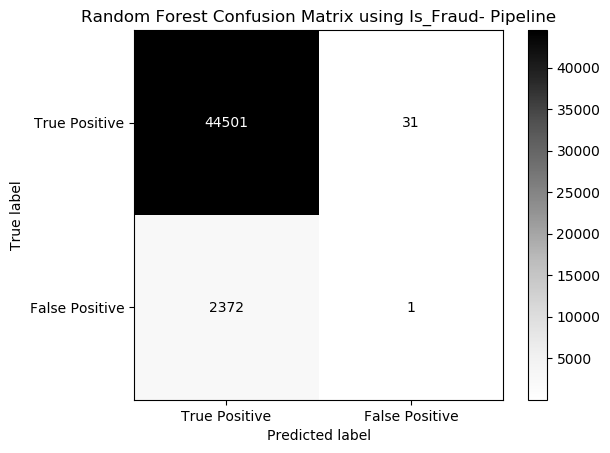

In [84]:
#2a. Model pipeline: preprocessing + Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))])

#2b. Train model
rf_model.fit(X_train, y_train)

# 2c. Evaluation – default threshold 0.5
y_pred = rf_model.predict(X_test)
print("Default threshold (0.5)")
RF_Accuracy= (accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#2d. Evaluation – custom threshold 0.3
y_proba = rf_model.predict_proba(X_test)[:, 1]      # probability of fraud
y_pred_03 = (y_proba >= 0.3).astype(int)

print("Custom threshold (0.3)")
print(classification_report(y_test, y_pred_03))

#2e.Classification Report
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(rf_cm)

#2f.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='Greys')
plt.title(f"Random Forest Confusion Matrix using Is_Fraud- {rf_model.__class__.__name__}")
plt.show()

# 3.Decision Tree

Default threshold (0.5)
Accuracy: 0.9010766442809935
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     44532
           1       0.05      0.05      0.05      2373

    accuracy                           0.90     46905
   macro avg       0.50      0.50      0.50     46905
weighted avg       0.90      0.90      0.90     46905

Custom threshold (0.3)
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     44532
           1       0.05      0.05      0.05      2373

    accuracy                           0.90     46905
   macro avg       0.50      0.50      0.50     46905
weighted avg       0.90      0.90      0.90     46905

Confusion Matrix
[[42142  2390]
 [ 2250   123]]


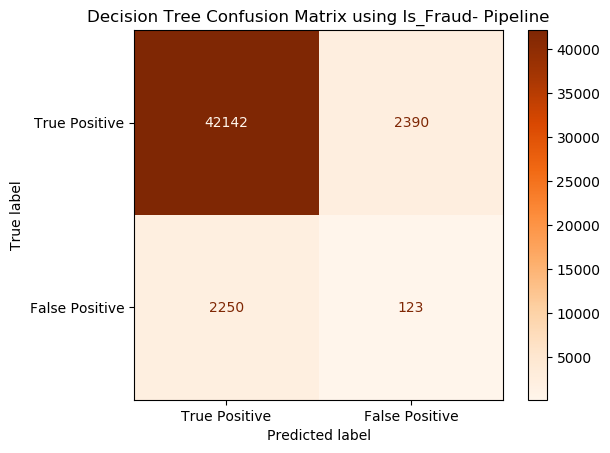

In [89]:
#3a. Model pipeline: preprocessing + Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', DecisionTreeClassifier(criterion = 'entropy', random_state = 0))])

#3b. Train model
dt_model.fit(X_train, y_train)

# 3c. Evaluation – default threshold 0.5
y_pred = dt_model.predict(X_test)
print("Default threshold (0.5)")
DT_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#3d. Evaluation – custom threshold 0.3
y_proba = dt_model.predict_proba(X_test)[:, 1]      # probability of fraud
y_pred_03 = (y_proba >= 0.3).astype(int)

print("Custom threshold (0.3)")
print(classification_report(y_test, y_pred_03))

#3e.Classification Report
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(dt_cm)

#3f.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='Oranges')
plt.title(f"Decision Tree Confusion Matrix using Is_Fraud- {dt_model.__class__.__name__}")
plt.show()

# 4. Support Vecotr Machine (Linear SVMR)

Accuracy: 0.5320541520093807
              precision    recall  f1-score   support

           0       0.95      0.54      0.68     44532
           1       0.05      0.47      0.09      2373

    accuracy                           0.53     46905
   macro avg       0.50      0.51      0.39     46905
weighted avg       0.90      0.53      0.65     46905

Confusion Matrix
[[23829 20703]
 [ 1246  1127]]


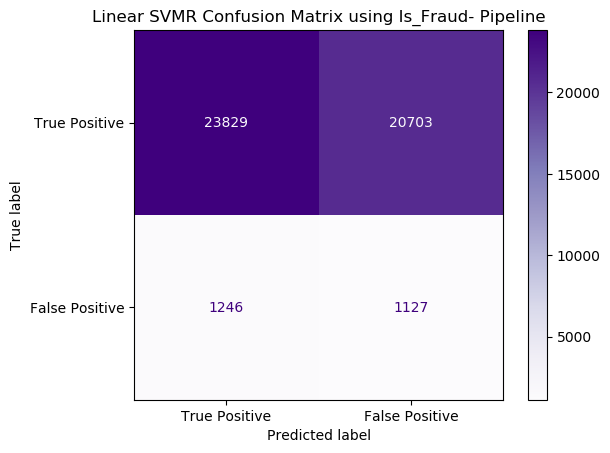

In [100]:
#4a. Model pipeline: preprocessing + Linear SVMR
from sklearn.svm import LinearSVC

svm_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LinearSVC(
        random_state=0,
        max_iter=3000,
        class_weight='balanced',
        dual=False
    ))
])

#4b. Train model
svm_model.fit(X_train, y_train)

# 4c. Evaluation – default threshold 0.5
y_pred = svm_model.predict(X_test)
SVMR_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#4d.Classification Report
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(svm_cm)

#4e.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='Purples')
plt.title(f"Linear SVMR Confusion Matrix using Is_Fraud- {svm_model.__class__.__name__}")
plt.show()


# 5. Support Vecotr Machine (RBF SVMR)

C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Accuracy: 0.05059162136232811
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     44532
           1       0.05      1.00      0.10      2373

    accuracy                           0.05     46905
   macro avg       0.03      0.50      0.05     46905
weighted avg       0.00      0.05      0.00     46905

Confusion Matrix
[[    0 44532]
 [    0  2373]]


C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


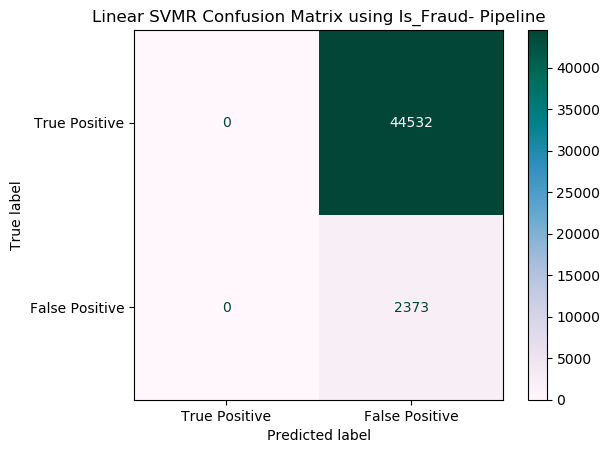

In [97]:
#5a. Model pipeline: preprocessing + SVMR
from sklearn.svm import SVC

svm_rbf_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', SVC(kernel = 'rbf',
                random_state=0,
                max_iter=3000,
               class_weight='balanced'
           ))
])

#5b. Train model
svm_rbf_model.fit(X_train, y_train)

# 5c. Evaluation – 
y_pred = svm_rbf_model.predict(X_test)
RBF_SVMR_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#5d.Classification Report
from sklearn.metrics import confusion_matrix
svm_rbf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(svm_rbf_cm)

#5e.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=svm_rbf_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='PuBuGn')
plt.title(f"Linear SVMR Confusion Matrix using Is_Fraud- {svm_rbf_model.__class__.__name__}")
plt.show()

# 6. K-Nearest Neighbour

In [ ]:
#6a. Model pipeline: preprocessing + KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2 ))
])

#6b. Train model
knn_model.fit(X_train, y_train)

# 6c. Evaluation 
y_pred = knn_model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

#6d.Classification Report
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(knn_cm)

#6e.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='YlGn')
plt.title(f"K-Nearest Neighbour Confusion Matrix using Is_Fraud- {knn_model.__class__.__name__}")
plt.show()

# 7. Multinominal Naive Bayes

##### MultinominalNB - for discrete counts (e.g., word frequencies).

Accuracy: 0.5086024944035817
              precision    recall  f1-score   support

           0       0.95      0.51      0.66     44532
           1       0.05      0.49      0.09      2373

    accuracy                           0.51     46905
   macro avg       0.50      0.50      0.38     46905
weighted avg       0.90      0.51      0.63     46905

Confusion Matrix
[[22696 21836]
 [ 1213  1160]]


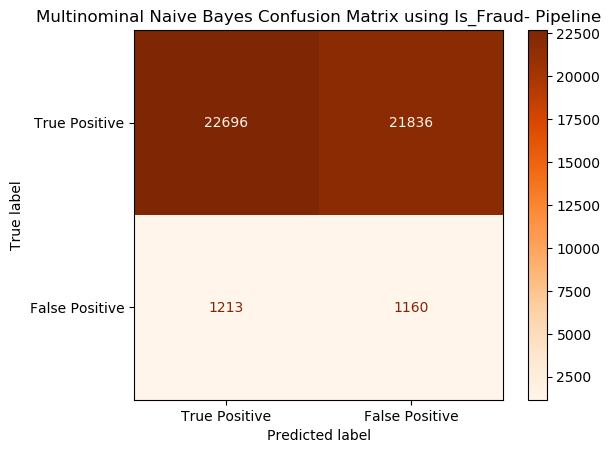

In [104]:
#7a- Model pipeline: preprocessing + MultinominalNB - for discrete counts (e.g., word frequencies).
from sklearn.naive_bayes import MultinomialNB
Mnb_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', MultinomialNB())])

#7b-Train model
Mnb_model.fit(X_train, y_train)

#7c-Evaluation 
y_pred = Mnb_model.predict(X_test)
MNB_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix

#7d-Classification Report
Mnb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(Mnb_cm)

#7e.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=Mnb_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='Oranges')
plt.title(f"Multinominal Naive Bayes Confusion Matrix using Is_Fraud- {Mnb_model.__class__.__name__}")
plt.show()

# 8. Bernoulli Naive Bias

##### BernoulliNB -for binary features (presence/absence)

Accuracy: 0.9494083786376719
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     44532
           1       0.00      0.00      0.00      2373

    accuracy                           0.95     46905
   macro avg       0.47      0.50      0.49     46905
weighted avg       0.90      0.95      0.92     46905

Confusion Matrix
[[44532     0]
 [ 2373     0]]


C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\PADDY\anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


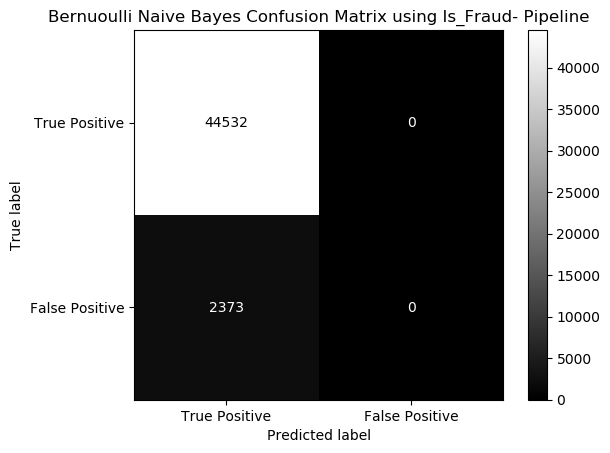

In [106]:
#8a.Model pipeline: preprocessing + for binary features (presence/absence)).
from sklearn.naive_bayes import BernoulliNB
Bnb_model = Pipeline(steps=[
    ('prep', preprocess),
    ('clf',BernoulliNB())])

#8b.Train model
Bnb_model.fit(X_train, y_train)

#8c.Evaluation 
y_pred = Bnb_model.predict(X_test)
BNB_Accuracy = (accuracy_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


#8d.Classification Report
from sklearn.metrics import confusion_matrix
Bnb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(Bnb_cm)

#8e.Dispplay Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=Bnb_cm, display_labels=['True Positive','False Positive'])
disp.plot(cmap='gray')
plt.title(f"Bernuoulli Naive Bayes Confusion Matrix using Is_Fraud- {Bnb_model.__class__.__name__}")
plt.show()

# Model Accuracy

In [150]:
print ("1.Logistic Regression       :",(round(LR_Accuracy,2)))
print("\033[1;31m2.Random Forest             :\033[0m",(round(RF_Accuracy,2)))
print ("3.Decision Tree             :",(round(DT_Accuracy,2)))
print ("4.Support Vecotr Machine    :",(round(SVMR_Accuracy,2)))
print ("5.Support Vecotr Machine RBF:",(round(RBF_SVMR_Accuracy,2))) 
print("\033[1;35m6.K-Nearest Neighbour       :\033[0m",(round(KNN_Accuracy,2)))
print ("7.Multinominal Naive Bias   :",(round(MNB_Accuracy,2))) 
print("\033[1;36m8.Bernoulli Naive Bias      :\033[0m",(round(BNB_Accuracy,2)))



1.Logistic Regression       : 0.53
2.Random Forest             : 0.95
3.Decision Tree             : 0.9
4.Support Vecotr Machine    : 0.53
5.Support Vecotr Machine RBF: 0.05
6.K-Nearest Neighbour       : 0.95
7.Multinominal Naive Bias   : 0.51
8.Bernoulli Naive Bias      : 0.95


# Model Creation

In [137]:
# Random Forest Model Creation
# Save  the model  (Phase -1 Development, Model Creation, Evaluvation & Save Model)
# wb - write binary
import pickle
filename = 'Bank_Fraud_finalized_model_RF.sav'
pickle.dump(rf_model,open(filename,'wb'))

In [140]:
# K-Nearest Neighbour model creation
# Save  the model  (Phase -1 Development, Model Creation, Evaluvation & Save Model)
# wb - write binary
import pickle
filename = 'Bank_Fraud_finalized_model_KNN.sav'
pickle.dump(knn_model,open(filename,'wb'))

In [139]:
# Bernoulli Naive Bias model  creation
# Save  the model  (Phase -1 Development, Model Creation, Evaluvation & Save Model)
# wb - write binary
import pickle#
filename = 'Bank_Fraud_finalized_model_BNB.sav'
pickle.dump(Bnb_model,open(filename,'wb'))